In [19]:
import matplotlib.pyplot as plt

In [20]:
import mesa as ms
import pylab as p
import numpy as np


%matplotlib inline 
p.rcParams['figure.figsize'] = 12, 8  # that's default image size for this interactive session

data_path = "/home/evol/fragkos/disk1/repos/CE_mesa/working/LOGS/"
a = ms.mesa(data_path=data_path, parallel=True, abundances=False, log_abundances = True, Yaxis='mass', Xaxis="log_inv_star_age",czones=False, Variable='v_div_vesc', orbit=True)

Process running in parallel on  48  cores
Process running in parallel on  48  cores


Process running in parallel on  48  cores


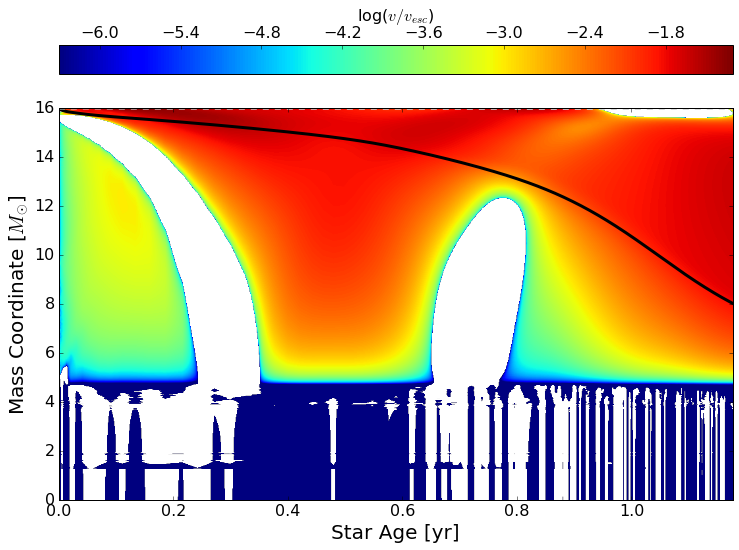

In [21]:
a.SetParameters(onscreen=True, cmap = 'jet', cmap_dynamic_range=5, signed_log_cmap=False,Yaxis='mass', Xaxis="star_age")
a.Kippenhahn()

Process running in parallel on  48  cores


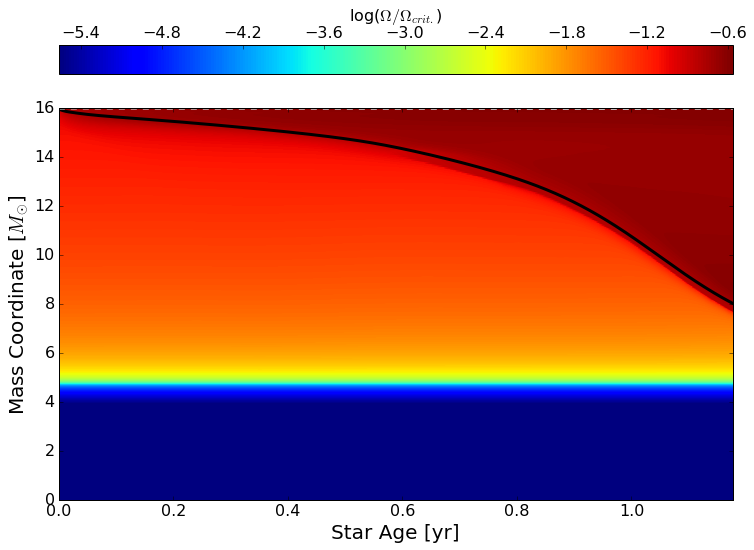

In [22]:
a.SetParameters(Variable='omega_div_omega_crit')
a.Kippenhahn()

Process running in parallel on  48  cores


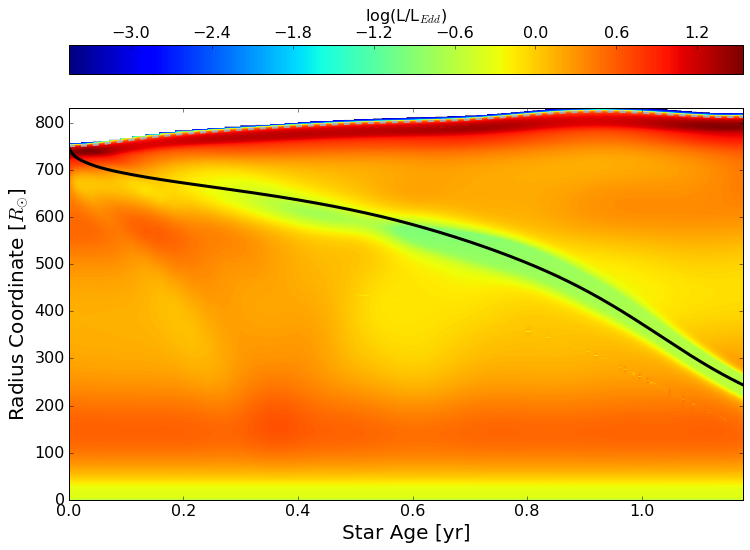

In [42]:
a.SetParameters(Yaxis="radius", Variable='L_div_Ledd', cmap_dynamic_range=5)
a.Kippenhahn()

Process running in parallel on  48  cores


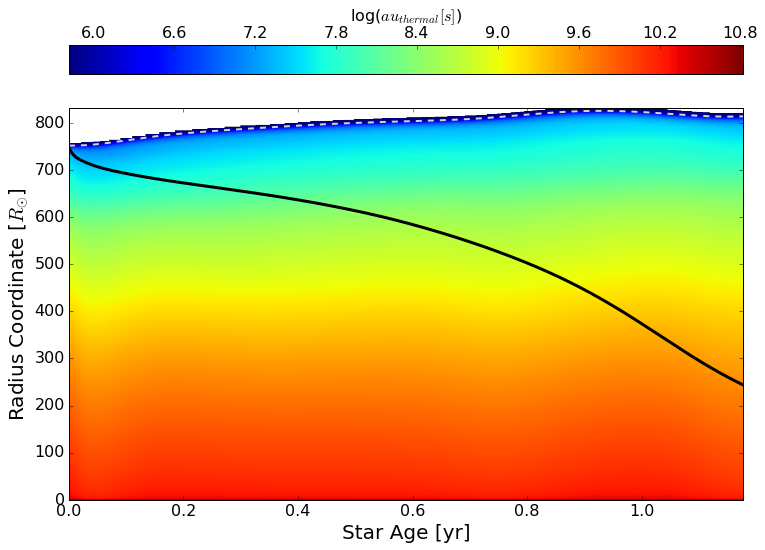

In [24]:
a.SetParameters(Yaxis="radius", Variable='t_thermal', cmap_dynamic_range=5)
a.Kippenhahn()

Process running in parallel on  48  cores


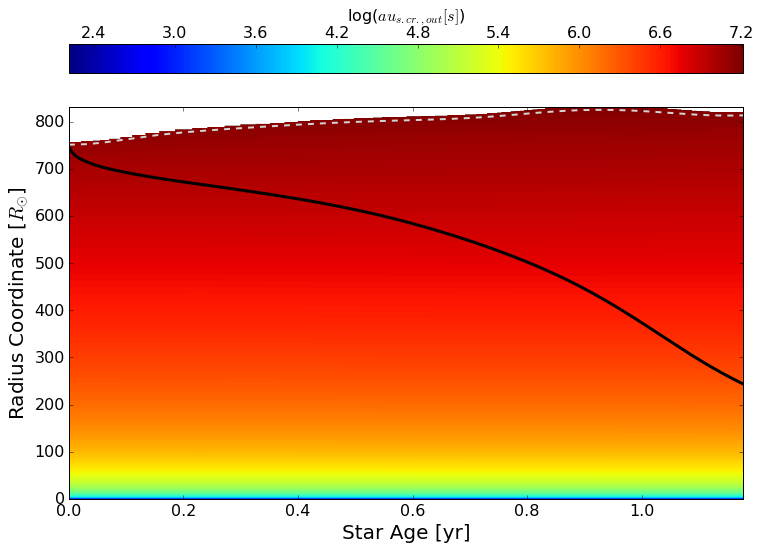

In [25]:
a.SetParameters(Yaxis="radius", Variable='t_dynamical', cmap_dynamic_range=5)
a.Kippenhahn()

Process running in parallel on  48  cores


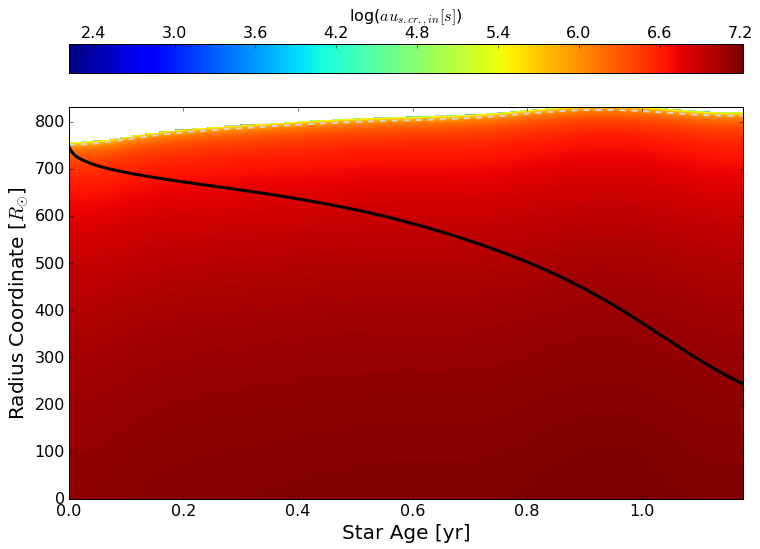

In [26]:
a.SetParameters(Yaxis="radius", Variable='t_dynamical_down', cmap_dynamic_range=5)
a.Kippenhahn()

Process running in parallel on  48  cores


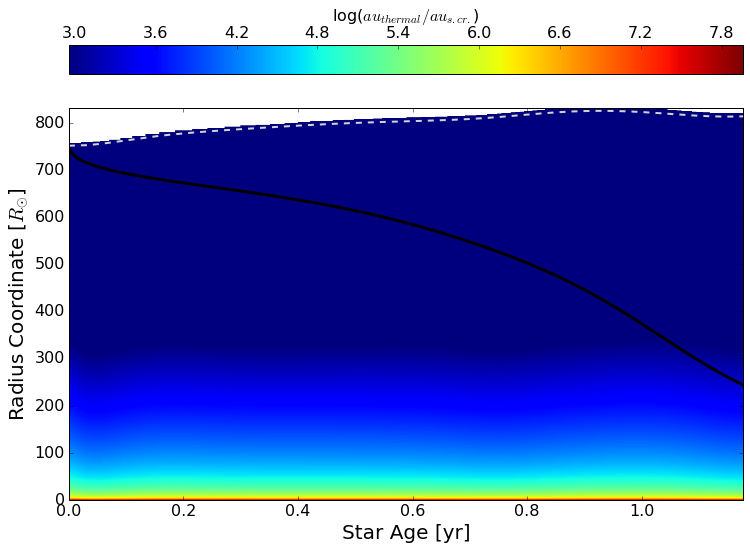

In [27]:
a.SetParameters(Yaxis="radius", Variable='t_thermal_div_t_dynamical', cmap_dynamic_range=5)
a.Kippenhahn()

Process running in parallel on  48  cores


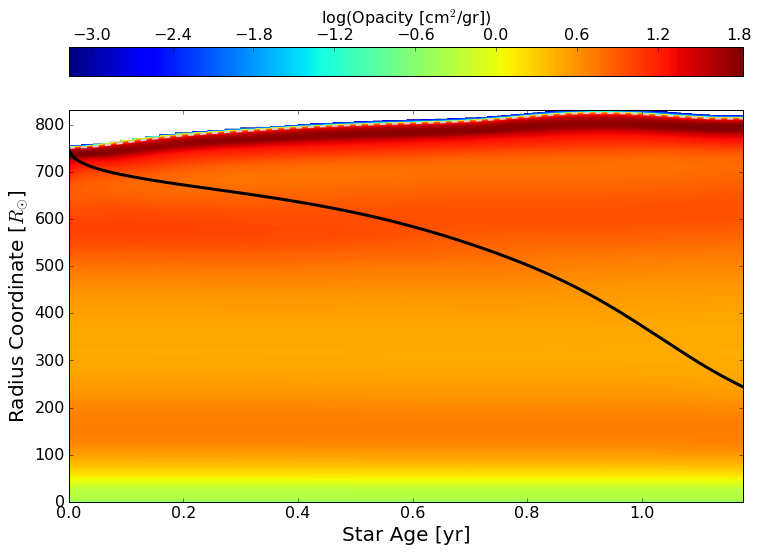

In [28]:
a.SetParameters(Yaxis="radius", Variable='opacity', cmap_dynamic_range=5)
a.Kippenhahn()

Process running in parallel on  48  cores


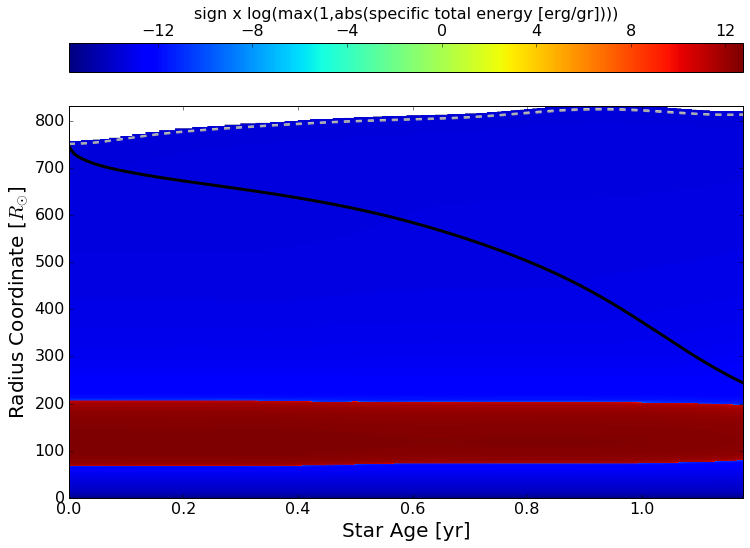

In [29]:
a.SetParameters(Variable='total_energy', cmap_dynamic_range=5,signed_log_cmap=True, tau100=True)
a.Kippenhahn()

Process running in parallel on  48  cores


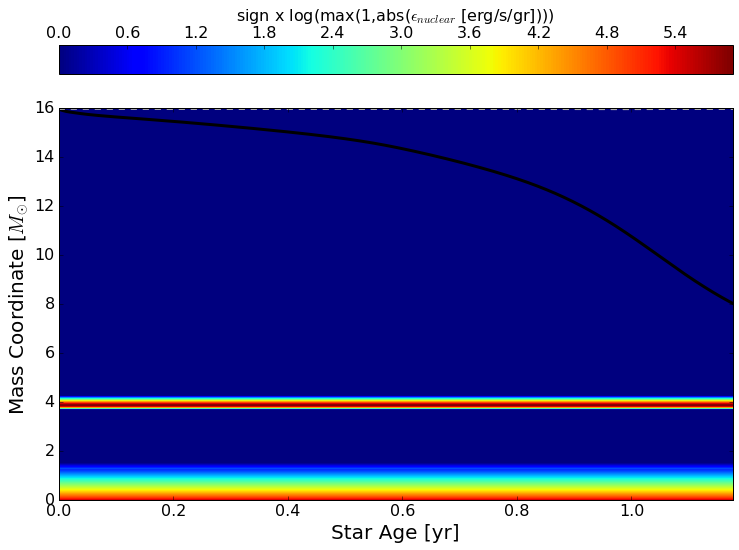

In [30]:
a.SetParameters(Variable='eps_nuc', cmap_dynamic_range=5,signed_log_cmap=True, tau100=True, Yaxis='mass', Xaxis='star_age')
a.Kippenhahn()

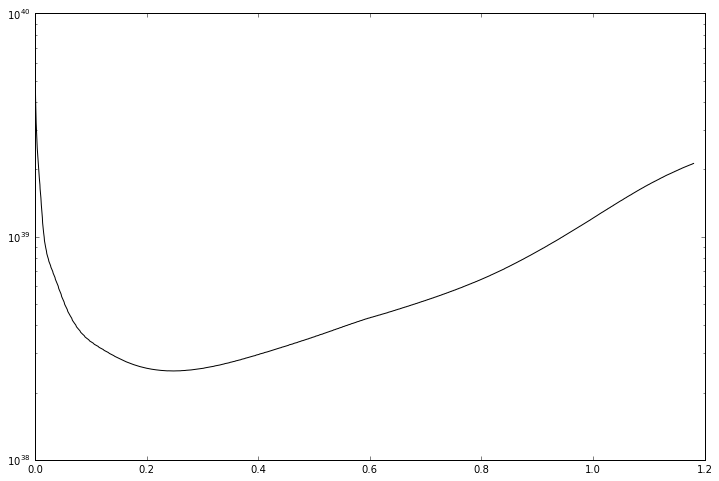

In [31]:
plt.plot(a.history['star_age'], a.history["CE_energy_rate"], color='k')
plt.yscale('log')
plt.ylim(1.0e38, 1.0e40)
plt.show()

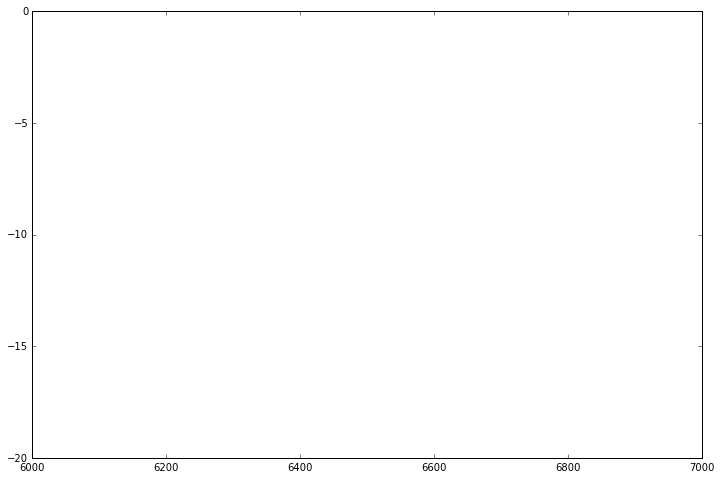

In [32]:
plt.plot(a.history['model_number'], a.history["log_abs_mdot"], color='k')
plt.xlim(6000, 7000)
plt.ylim(-20, 0.0)
plt.show()

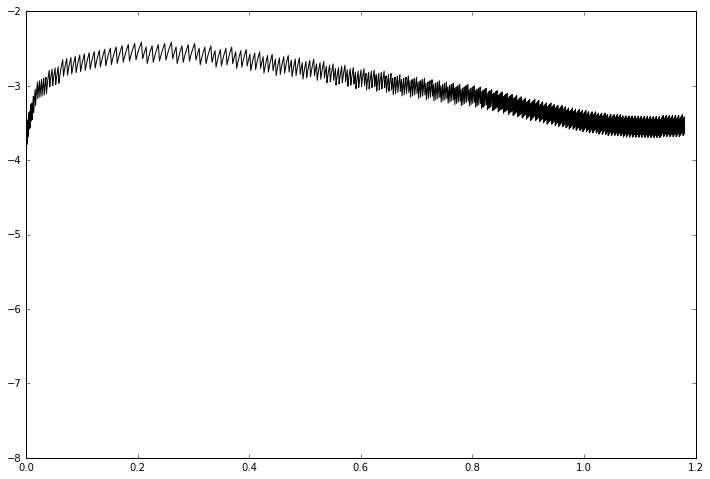

In [33]:
plt.plot(a.history['star_age'], a.history["log_dt"], color='k')
plt.show()

Process running in parallel on  48  cores


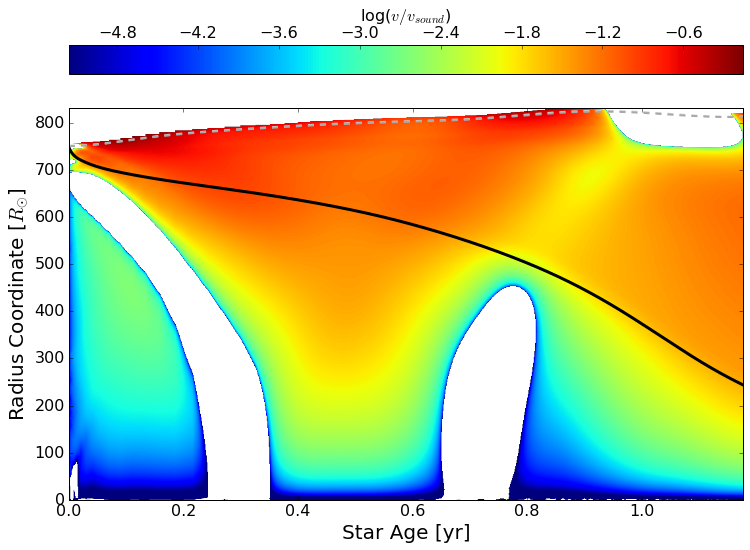

In [34]:
a.SetParameters(Yaxis="radius", Variable='v_div_csound', cmap_dynamic_range=5,signed_log_cmap=False)
a.Kippenhahn()

Process running in parallel on  48  cores


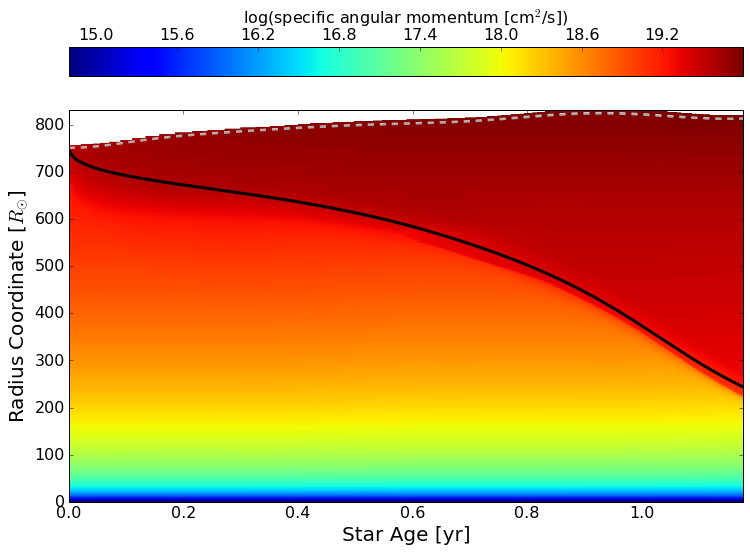

In [35]:
a.SetParameters(Yaxis="radius", Variable='j_rot', cmap_dynamic_range=5,signed_log_cmap=False)
a.Kippenhahn()

Process running in parallel on  48  cores


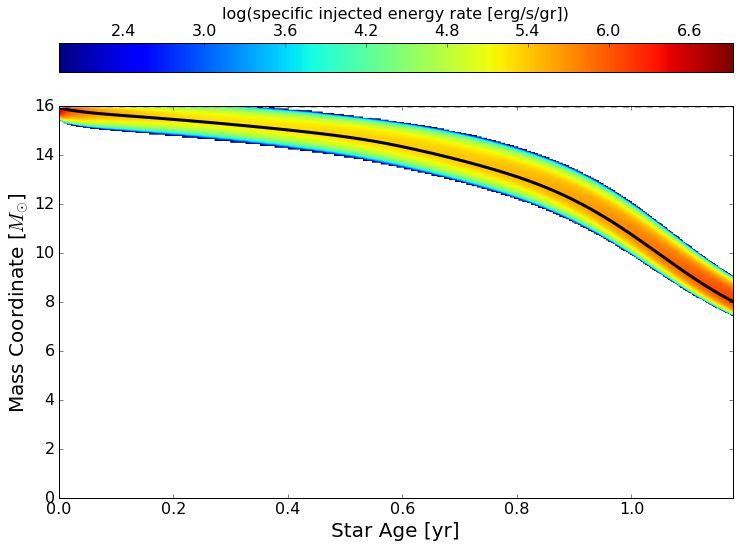

In [36]:

a.SetParameters(Yaxis="mass", Variable='extra_heat', cmap_dynamic_range=5,signed_log_cmap=False)
a.Kippenhahn()

Process running in parallel on  48  cores


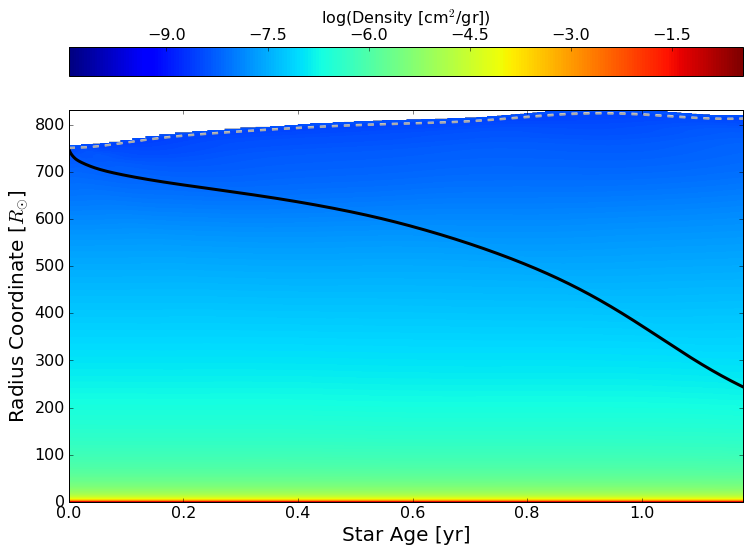

In [37]:
a.SetParameters(Yaxis="radius", Variable='density', cmap_dynamic_range=10,signed_log_cmap=False)
a.Kippenhahn()

Process running in parallel on  48  cores


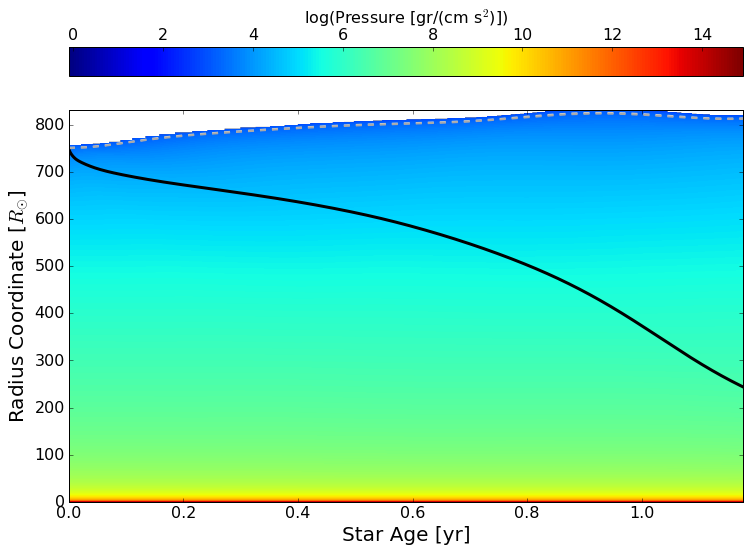

In [38]:
a.SetParameters(Yaxis="radius", Variable='pressure', cmap_dynamic_range=15,signed_log_cmap=False)
a.Kippenhahn()

Process running in parallel on  48  cores


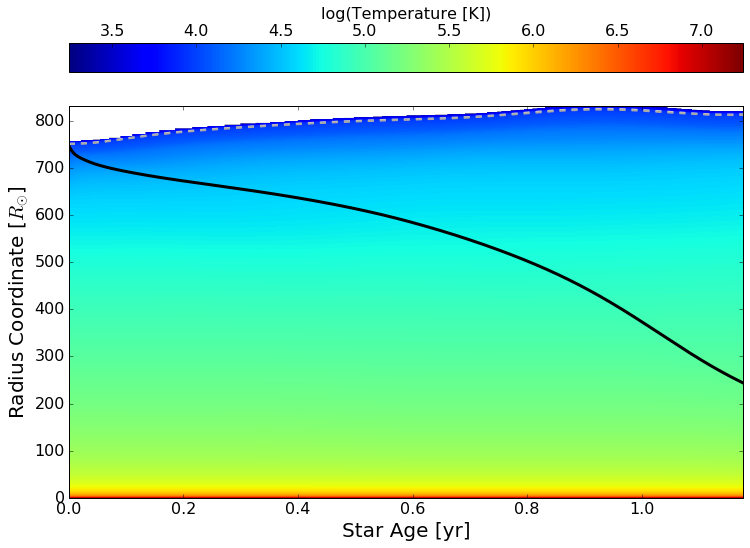

In [39]:
a.SetParameters(Yaxis="radius", Variable='temperature', cmap_dynamic_range=4,signed_log_cmap=False)
a.Kippenhahn()

Process running in parallel on  48  cores


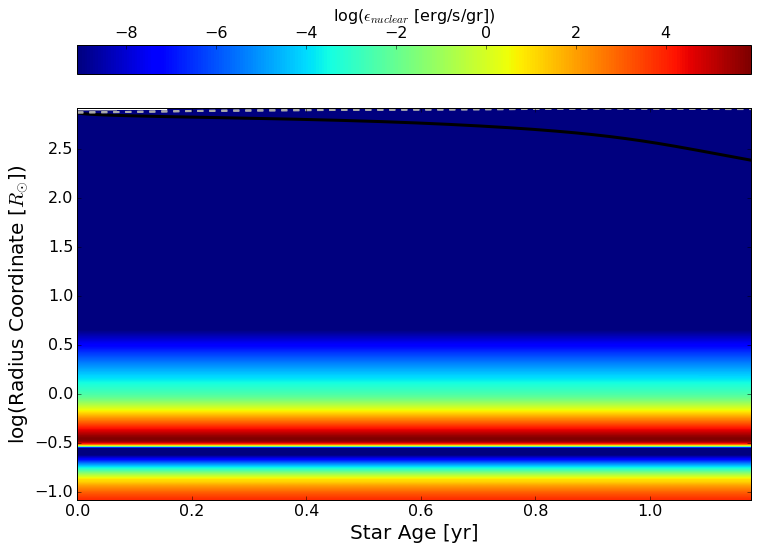

In [40]:
a.SetParameters(Yaxis="log_radius", Variable='eps_nuc', cmap_dynamic_range=15,signed_log_cmap=False)
a.Kippenhahn()